In [1]:
from spectra.nv_ground_state import *

Consider a diamond sample containing a large number of NV centers with primarily N-14 nitrogen isotopes. How can we use this diamond sample to verify that our antenna, applied magnetic field manipulator, and other devices function without the use of single NVs?

First let's assume a two-particle system consisting of an electron and a nucleus, noting that the nuclear spin for N-14 is 1. From Doherty et. al. 2013, the spin-Hamiltonian for trigonal defects is:


$H = D_{gs}\Bigg[\hat{S_{z}^{2}} - S(S+1)\Bigg] + A_{gs}^{||}\hat{S_{z}}\hat{I_{z}} + A_{gs}^{\perp}\Bigg[\hat{S_{x}}\hat{I_{x}} + \hat{S_{y}}\hat{I_{y}}\Bigg] + P_{gs}\Bigg[\hat{I_{z}^{2}} - I(I+1)/3\Bigg]$


Note: recall that the Hilbert space of a system of multiple particles is the tensor product of the Hilbert spaces of the individual particles. This is a necessary descriptor in order to capture the properties of quantum mechanics! The dimension of our Hamiltonian is then 9x9.

In [2]:
static_bvec = [0, 0, 3.E-2] # Applied static magnetic field in Tesla
transition_bvec = np.array([0., 1.E-4, 0]) # RF field vector, for transition amplitudes
initial_state = [0, 1/3, 0, 0, 0, 0, 0, 1/3, 1/3] # Initial distribution of population per eigenstate 
# Note that one of our possible states is [0,0,0,0,0,0,0,0,1], but that there is no higher energy state still in the ground
# state. Thus there are no transitions from this state.

For our first example, a sample has been optically driven so that all NV electron spins are in the spin 0 state. This initial state is represented as "initial_state" above, where each entry describes a percentage of the population in a given eigenstate. We assume there is an equal distribution of all nuclear spins. This method combines quantum mechanics with statistics and is thus not a completely correct treatment, but we will assume large enough populations such that non-physical tendencies are negligible. 

Our applied B-field in this example is 300 G parallel to a given NV-axis, where the NV-axis is $\hat{z}$.

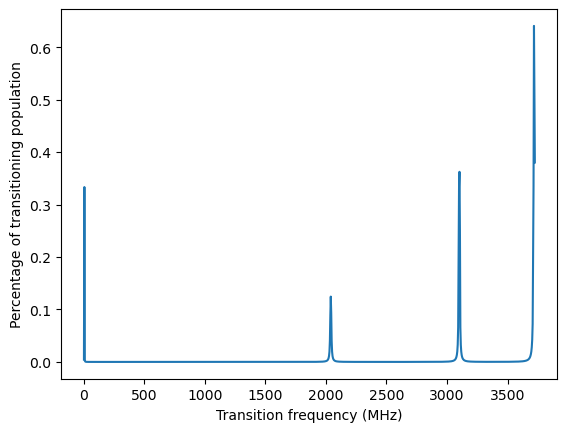

In [3]:
plot_nv_config_averaging_power_broad(transition_bvec=transition_bvec, static_bvec=static_bvec,
                                     initial_state=initial_state)

If we were examining the behavior of a single NV center under a driving RF-field and static B-field parallel to the NV-axis, we would observe a symmetric Zeeman splitting at two transition frequencies. However, in this notebook we are examining the spectrum given by a ensemble of NV centers spanning all potential NV-configurations. Thus, not only are peaks not symmetric (the static magnetic field cannot be parallel to all four NV-axes), but there are also more than two of them.

The plot above matches our expectation because...

This matches what is expected because...(explain)
Attatch data or other proof

Consider the following example from (literature).

In [2]:
static_bvec = [1.3E-3, 1.3E-3, 1.3E-6]
transition_bvec = np.array([0, 1.E-4, 0])
initial_state = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]

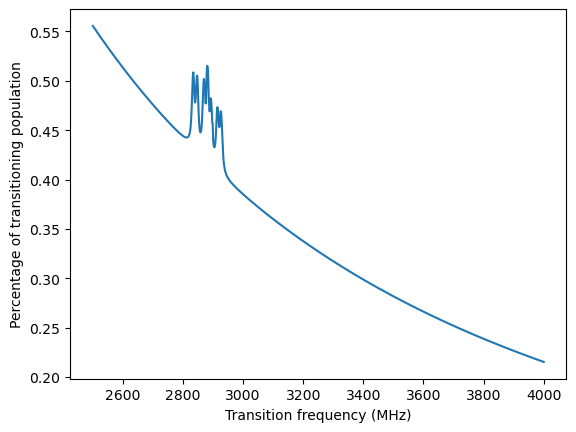

In [3]:
plot_nv_config_averaging_power_broad(transition_bvec=transition_bvec, static_bvec=static_bvec,
                                     initial_state=initial_state)

This matches what is expected from (literature) because...
Attatch images/graphs if possible

In [14]:
p = NVGroundParameters14N()
energies, eigenstates = get_nv_ground_eigenspectrum(p)
print(energies)

[-1.92167253e+09 -1.92167253e+09 -1.91666507e+09  9.56190000e+08
  9.56190000e+08  9.60470000e+08  9.60475068e+08  9.63342527e+08
  9.63342527e+08]


In [18]:
static_bvec = [0, 0, 4.6E-3]
transition_bvec = np.array([0, 1.E-4, 0])
hh_int = get_magnetic_transition_operator(p, transition_bvec)
energies, eigenstates = get_nv_ground_eigenspectrum(p, static_bvec)

transition_energies, transition_amplitudes = get_transition_amplitudes(hh_int, energies, eigenstates)

In [16]:
print(transition_amplitudes)

[0.00000000e+00 3.93966158e+03 1.98213832e+06 2.22986280e+01
 0.00000000e+00 0.00000000e+00 1.98213537e+06 0.00000000e+00
 3.94057482e+03 0.00000000e+00 1.98213535e+06 0.00000000e+00
 1.98213846e+06 1.70457898e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.98213461e+06 0.00000000e+00 0.00000000e+00
 1.98213476e+06 0.00000000e+00 1.72426987e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.72979661e+03 0.00000000e+00
 0.00000000e+00 3.72302460e+03 0.00000000e+00 3.72214399e+03
 0.00000000e+00 0.00000000e+00 1.55813565e+03 1.56282297e+03]


In [17]:
print(transition_energies)

[2.85293416e+04 5.02171884e+06 2.74891692e+09 2.75322788e+09
 2.75608372e+09 3.00683667e+09 3.01109080e+09 3.01397494e+09
 4.99318950e+06 2.74888839e+09 2.75319935e+09 2.75605519e+09
 3.00680814e+09 3.01106227e+09 3.01394641e+09 2.74389520e+09
 2.74820616e+09 2.75106200e+09 3.00181495e+09 3.00606908e+09
 3.00895322e+09 4.31095566e+06 7.16679658e+06 2.57919753e+08
 2.62173875e+08 2.65058020e+08 2.85584092e+06 2.53608797e+08
 2.57862920e+08 2.60747065e+08 2.50752957e+08 2.55007079e+08
 2.57891224e+08 4.25412208e+06 7.13826724e+06 2.88414516e+06]


In [22]:
lspace, spectrum = get_power_broadened_spectrum(transition_bvec=transition_bvec, static_bvec=static_bvec,
                                                    initial_state=initial_state, tescale=1.E-6, tascale=1.E-3)
print(transition_energies[2])
print(transition_amplitudes[2])

2748916920.0134277
1982138.318169128


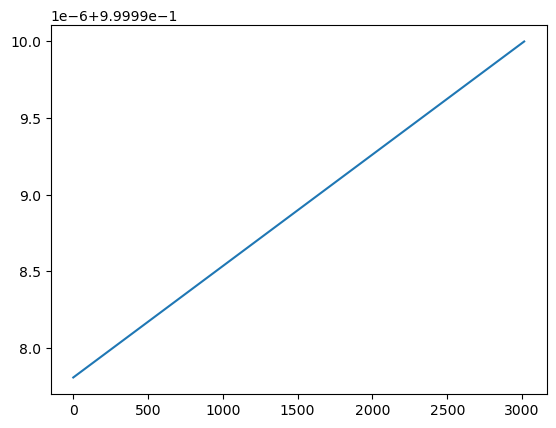

In [23]:
plt.plot(lspace, lorentz_lineshape(lspace, transition_energies[2], transition_amplitudes[2]))

In [24]:
print(lspace)

[0.00000000e+00 2.94621206e+00 5.89242413e+00 ... 3.00808252e+03
 3.01102873e+03 3.01397494e+03]
